Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Martin Knap"
COLLABORATORS = ""

---

# Domača naloga 2: Sivinske preslikave slik
1. Napišite funkcijo `makeNegativeImage`, ki preslika najtemnejšo vrednost na sliki v najsvetlješo vrednost na sliki in obratno. Preslikava naj bo linearna: $s(x, y) = a r(x, y) + b$. Funkcija naj sprejeme sliko in vrne preslikano sliko. Tako preslikano sliko imenujemo *negativ*.

In [2]:
# naložite module
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
from nose.tools import assert_equal, assert_almost_equal
import rvlib

In [3]:
def makeNegativeImage(image):
    iImageType = image.dtype
    iImage = image.astype('float')
    
    if iImageType.kind in ('u', 'i'):
        imageMax = np.iinfo(iImageType).max
    else:
        imageMax = np.max(iImage)
    negative_image = -iImage + imageMax
    
    return negative_image.astype(iImageType)

In [4]:
test_image = (np.random.rand(32, 32) * 256).astype('uint8')
test_negative = makeNegativeImage(test_image)
max_ix_orig = np.argmax(test_image)
min_ix_orig = np.argmin(test_image)
max_ix_neg = np.argmax(test_negative)
min_ix_neg = np.argmin(test_negative)
# Indeks najmanjše vrednosti v začetni sliki mora biti enak indeksu največje vrednosti v preslikani sliki
assert_equal(max_ix_orig, min_ix_neg)
# In obratno
assert_equal(min_ix_orig, max_ix_neg)
# Seštevek originalne in preslikane slike mora biti slika, v kateri imajo vsi elementi vrednost 255
assert(np.all(test_image + test_negative == 255))

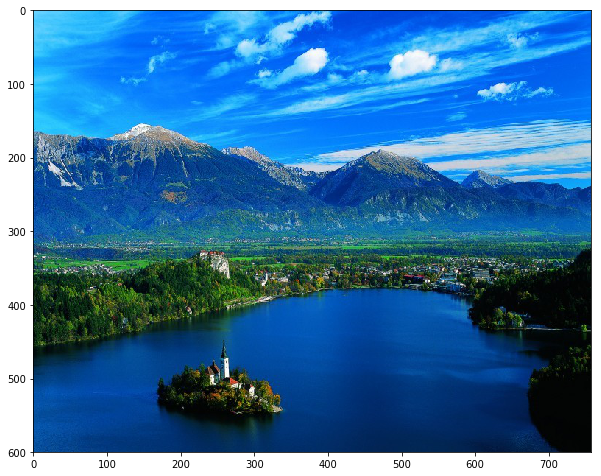

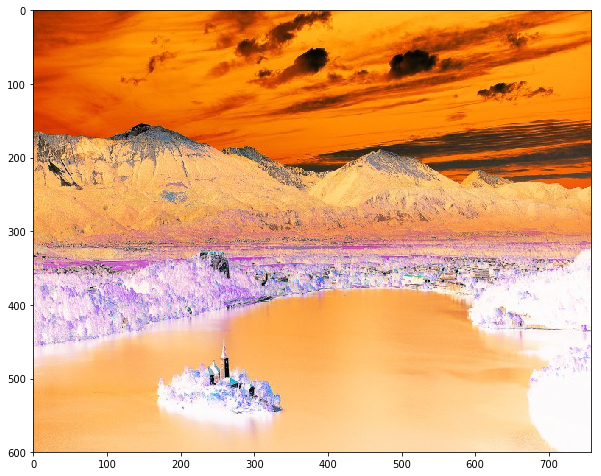

In [5]:
# S pomočjo funkcije makeNegativeImage preslikajte sliko, ki se nahaja v datoteki "./data/slika.jpg" in jo prikažite
slika = np.array(Image.open('./data/slika.jpg'))
plt.figure(figsize = (10,10))
plt.imshow(slika)
negative_slika = makeNegativeImage(slika)
plt.figure(figsize = (10,10))
plt.imshow(negative_slika)

2.  1. Napišite funkcijo `window_middle80_parameters`, ki izračuna vrednosti parametrov $c$ in $w$ sivinskega oknjenja tako, da iz slike odstrani 10% najtemnejših in 10% najsvetlejših slikovnih elementov. Funkcija naj vrne tuple parametrov $c$ in $w$: `(c, w)`.
    2. Z dobljenimi parametri nato izračunajte oknjeno sliko in jo narišite.

In [6]:
# Implementirajte funkcijo
def window_middle80_parameters(image):
    flat_image = image.flatten()
    sort_flat_image = np.sort(flat_image)
    plt.figure()
    plt.hist(sort_flat_image)
    len_flat_image = len(flat_image)
    index_10 = int(len_flat_image * 0.1)
    index_90 = int(len_flat_image * 0.9)
    
    lower_limit = sort_flat_image[index_10]
    upper_limit = sort_flat_image[index_90]
    
    w = upper_limit - lower_limit
    c = int((upper_limit + lower_limit)/2)
    print("c:", c,"w:", w)
    
    return (c, w)

c: 127 w: 0


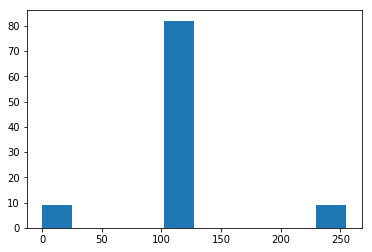

In [7]:
# Testi funkcije window_middle80_parameters
test_image = np.zeros((10, 10), dtype='uint8')
test_image[0, 0] = 127
test_image[:, 1:-1] = 127
test_image[:, -1] = 255;
test_image[-1, -1] = 127
c, w = window_middle80_parameters(test_image)
assert_almost_equal(c, 127)
assert_almost_equal(w, 0)

c: 88 w: 119


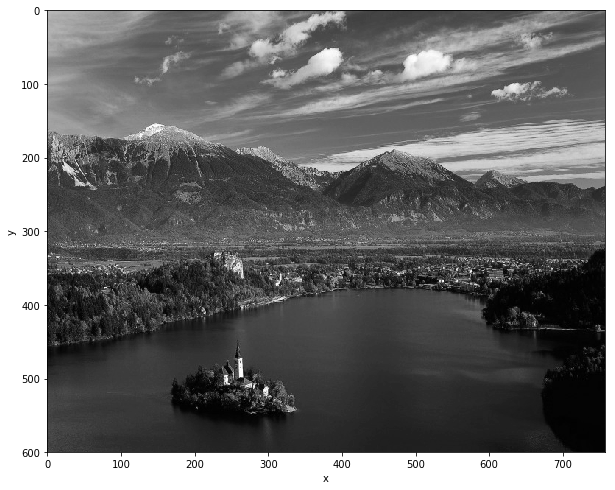

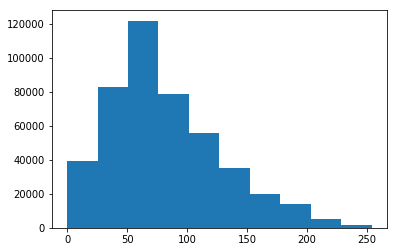

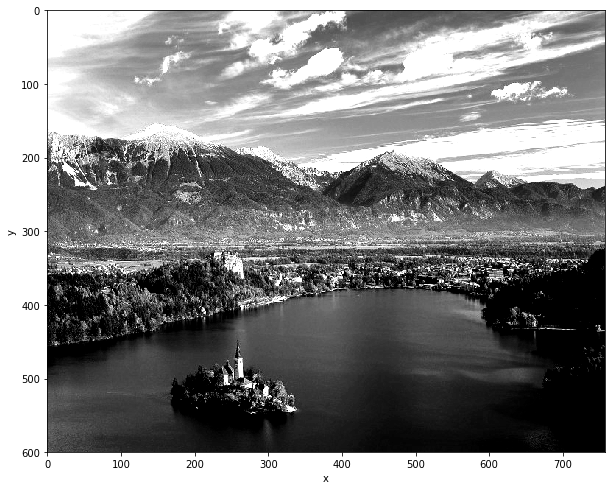

In [8]:
# S pomočjo funkcije window_middle80_parameters izračunajte 
# oknjeno sliko ter jo narišite. Uporabite sliko, ki se nahaja
# v datoteki "./data/slika.jpg"
siva = rvlib.convertToGray(slika)
plt.figure(figsize = (10,10))
rvlib.showImage(siva)

c, w = window_middle80_parameters(siva)
win_siva = rvlib.windowImage(siva, c, w)
plt.figure(figsize = (10,10))
rvlib.showImage(win_siva)


3. 1. Napišite funkcijo ki določi prag $t$ za funkcijo upragovljanja tako, da bo natanko 50% najsvetlejših slikovnih elementov v vhodni sivinski sliki nad tem pragom. 
   2. Upragovljeno sliko prikažite.

In [9]:
def calculate_threshold50(image):
    flat_image = image.flatten()
    sort_flat_image = np.sort(flat_image)
    len_flat_image = len(flat_image)
    index_50 = int(len_flat_image * 0.5)
    
    #plt.figure()
    #plt.hist(sort_flat_image)
    
    t_1 = sort_flat_image[index_50]
    t_2 = sort_flat_image[index_50 - 1]
    
    t = (t_1 + t_2)/2
    print(t_1, t_2)
    print(t)

    return t

In [10]:
test_image = np.ones((10, 10))
test_image[:, :5] = 0
threshold = calculate_threshold50(test_image)
assert(threshold > 0)
assert(threshold < 1)

1.0 0.0
0.5


72 72
72.0


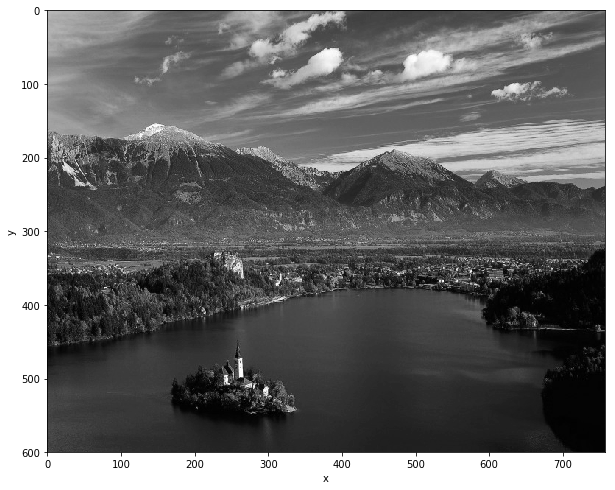

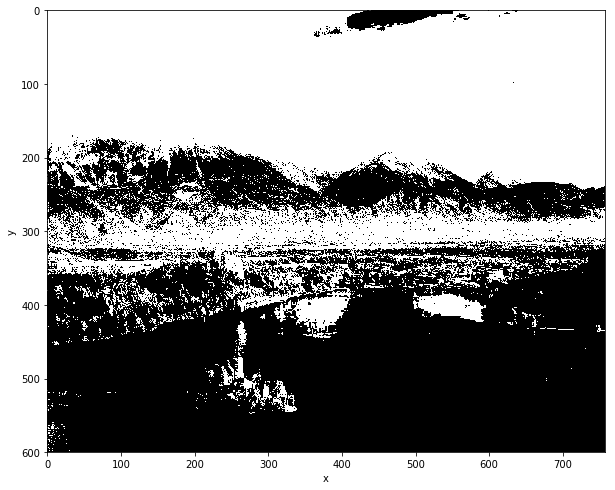

In [11]:
# S pomočjo funkcije calculate_threshold izračunajte prag in nato
# z njim upragovite sliko ter dobljeno sliko izrišite. Uporabite 
# sliko, ki se nahaja v datoteki "./data/slika.jpg"

plt.figure(figsize = (10,10))
rvlib.showImage(siva)
t = calculate_threshold50(siva)
thr_siva = rvlib.thresholdImage(siva, t)
plt.figure(figsize = (10,10))
rvlib.showImage(thr_siva)

4. 1. Napišite funkcijo `calculate_gamma_image` za gama sivinsko preslikavo $RGB$ barvne slike tako, da sliko najprej pretvorite v $HSV$ barvni prostor, nato izvedite gama preslikavo nad komponento $V$, in $HSV$ sliko pretvorite nazaj v $RGB$ barvni prostor. 

   2. Prikažite primera gama preslikanih barvnih slik za $\gamma < 1$ in $\gamma > 1$. 

   3. Ali ima tak način gama preslikave barvne slike enak vpliv na kontrast kot v primeru sivinske slike?

In [12]:
# Implementirajte funkcijo
def calculate_gamma_image(image, gamma):
    image = image.astype('float')
    #pretvorba v hsv
    
    image = image / 255.0
    r,g,b = image[:,:,0], image[:,:,1], image[:,:,2]
    
    h = np.zeros_like(r)
    s = np.zeros_like(r)
    v = np.zeros_like(r)
    
    Cmax = np.maximum(r, np.maximum(g, b))
    Cmin = np.minimum(r, np.minimum(g, b))
    delta = Cmax - Cmin + 1e-7
    
    h[Cmax == r] = 60.0 * ((g[Cmax == r] - b[Cmax == r])/(delta[Cmax == r]) % 6.0)
    h[Cmax == g] = 60.0 * ((b[Cmax == g] - r[Cmax == g])/(delta[Cmax == g]) + 2.0)
    h[Cmax == b] = 60.0 * ((r[Cmax == b] - g[Cmax == b])/(delta[Cmax == b]) + 4.0)
    
    s[delta!=0.0] = delta[delta!=0.0] / (Cmax[delta!=0.0]+1e-7)
    
    v = Cmax
    
    #gamma preslikava nad v
    min_v = np.min(v)
    max_v = np.max(v)
    
    v_int = max_v - min_v
    v = (v - min_v) / float(v_int)
    v = ((v - min_v) / float(v_int)) ** gamma
    v = min_v + v * float(v_int)
    
#     image_gamma = np.zeros_like(image)
#     image_gamma[:,:,0] = h
#     image_gamma[:,:,1] = s
#     image_gamma[:,:,2] = v
    
    
    
    #pretvorba v rgb
#     h = image_gamma[:,:, 0]
#     s = image_gamma[:,:, 1]
#     v = image_gamma[:,:, 2]
    
    C = v * s
    X = C * (1.0 - np.abs(((h/60.0)%2)-1))
    m = v - C
    
    r = np.zeros_like(h)
    g = np.zeros_like(h)
    b = np.zeros_like(h)
    
    r[ (h>=0.0) * (h<60.0) ] = C[ (h>=0.0) * (h<60.0)]
    g[ (h>=0.0) * (h<60.0) ] = X[ (h>=0.0) * (h<60.0)]
    
    r[ (h>=60.0) * (h<120.0) ] = X[ (h>=60.0) * (h<120.0)]
    g[ (h>=60.0) * (h<120.0) ] = C[ (h>=60.0) * (h<120.0)]
    
    g[ (h>=120.0) * (h<180.0) ] = C[ (h>=120.0) * (h<180.0)]
    b[ (h>=120.0) * (h<180.0) ] = X[ (h>=120.0) * (h<180.0)]
    
    g[ (h>=180.0) * (h<240.0) ] = X[ (h>=180.0) * (h<240.0)]
    b[ (h>=180.0) * (h<240.0) ] = C[ (h>=180.0) * (h<240.0)]
    
    r[ (h>=240.0) * (h<300.0) ] = X[ (h>=240.0) * (h<300.0)]
    b[ (h>=240.0) * (h<300.0) ] = C[ (h>=240.0) * (h<300.0)]
    
    r[ (h>=300.0) * (h<360.0) ] = C[ (h>=300.0) * (h<360.0)]
    b[ (h>=300.0) * (h<360.0) ] = X[ (h>=300.0) * (h<360.0)]
    
    r = r + m
    g = g + m
    b = b + m
    
    oImage = np.zeros_like(image)
    oImage[:,:,0] = r
    oImage[:,:,1] = g
    oImage[:,:,2] = b
    
    oImage = 255.0 * oImage
    oImage[oImage > 255.0] = 255.0
    oImage[oImage < 0.0] = 0.0
    
    image_gamma = oImage.astype('uint8')       
    
    return image_gamma


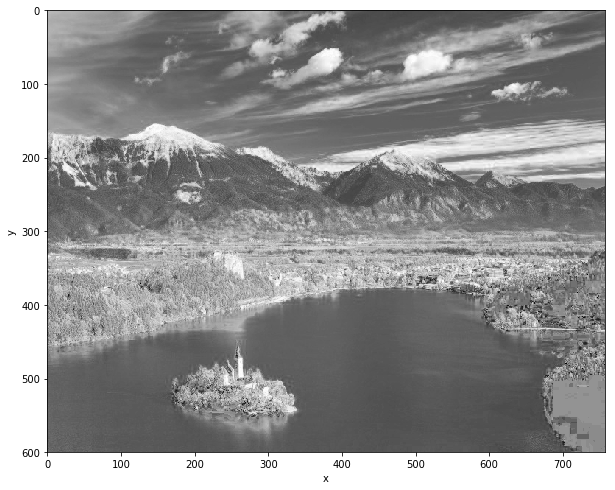

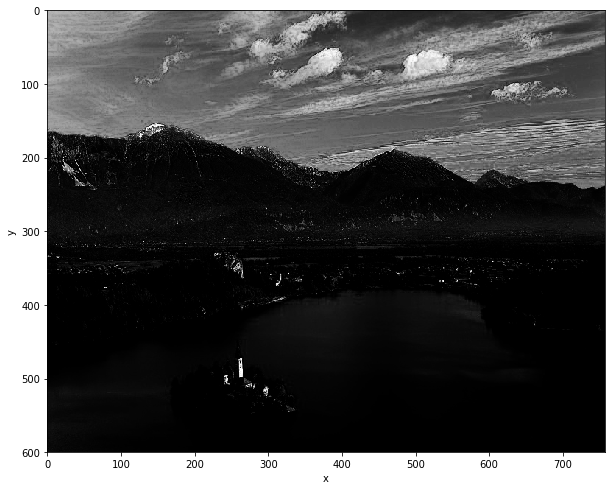

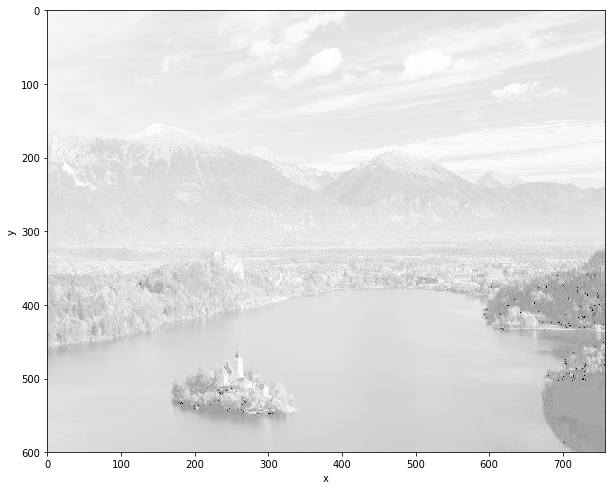

In [18]:
# S pomočjo funkcije calculate_gamma_iamge preslikajte sliko v datoteki
# "./data/slika.jpg" s parametrom gamma, ki je manjši od 1 in parametrom
# gamma, ki je večji od ena. Dobljeni sliki tudi prikažite.

#gamma < 1
hsv_slika_pod_ena = calculate_gamma_image(slika, 0.1)
hsv_siva_pod_ena = rvlib.convertToGray(hsv_slika_pod_ena)
plt.figure(figsize = (10,10))
rvlib.showImage(hsv_siva_pod_ena)
#gamma > 1
hsv_slika_nad_ena = calculate_gamma_image(slika, 5)
hsv_siva_nad_ena = rvlib.convertToGray(hsv_slika_nad_ena)
plt.figure(figsize = (10,10))
rvlib.showImage(hsv_siva_nad_ena)

#gamma preslikava nad sivinsko sliko
hsv_siva = rvlib.gammaImage(siva, 0.1)
plt.figure(figsize = (10,10))
rvlib.showImage(hsv_siva)

    C. Ali ima tak način gama preslikave barvne slike enak vpliv na kontrast kot v primeru sivinske slike?

ne

5. 1. Napišite funkcijo za preslikavo barvne slike v sivinsko sliko tako, da v HSV barvnem prostoru komponento barvnega nasičenja postavite na 0. 
   2. Prikažite pridobljeno sivinsko sliko.

In [14]:
# Implementirajte funkcijo
def convert_to_gray_hsv(image):
    iImage = image.astype('float')
    #rgb to hsv
    
    iImage = iImage / 255.0
    r,g,b = iImage[:,:,0], iImage[:,:,1], iImage[:,:,2]
    
    h = np.zeros_like(r)
    s = np.zeros_like(r)
    v = np.zeros_like(r)
    
    Cmax = np.maximum(r, np.maximum(g, b))
    Cmin = np.minimum(r, np.minimum(g, b))
    delta = Cmax - Cmin + 1e-7
    
    h[Cmax == r] = 60.0 * ((g[Cmax == r] - b[Cmax == r])/(delta[Cmax == r]) % 6.0)
    h[Cmax == g] = 60.0 * ((b[Cmax == g] - r[Cmax == g])/(delta[Cmax == g]) + 2.0)
    h[Cmax == b] = 60.0 * ((r[Cmax == b] - g[Cmax == b])/(delta[Cmax == b]) + 4.0)
    
    v = Cmax
    
    #hsv to rgb   
    C = v * s
    X = C * (1.0 - np.abs(((h/60.0)%2)-1))
    m = v - C
    
    r = np.zeros_like(h)
    g = np.zeros_like(h)
    b = np.zeros_like(h)
    
    r[ (h>=0.0) * (h<60.0) ] = C[ (h>=0.0) * (h<60.0)]
    g[ (h>=0.0) * (h<60.0) ] = X[ (h>=0.0) * (h<60.0)]
    
    r[ (h>=60.0) * (h<120.0) ] = X[ (h>=60.0) * (h<120.0)]
    g[ (h>=60.0) * (h<120.0) ] = C[ (h>=60.0) * (h<120.0)]
    
    g[ (h>=120.0) * (h<180.0) ] = C[ (h>=120.0) * (h<180.0)]
    b[ (h>=120.0) * (h<180.0) ] = X[ (h>=120.0) * (h<180.0)]
    
    g[ (h>=180.0) * (h<240.0) ] = X[ (h>=180.0) * (h<240.0)]
    b[ (h>=180.0) * (h<240.0) ] = C[ (h>=180.0) * (h<240.0)]
    
    r[ (h>=240.0) * (h<300.0) ] = X[ (h>=240.0) * (h<300.0)]
    b[ (h>=240.0) * (h<300.0) ] = C[ (h>=240.0) * (h<300.0)]
    
    r[ (h>=300.0) * (h<360.0) ] = C[ (h>=300.0) * (h<360.0)]
    b[ (h>=300.0) * (h<360.0) ] = X[ (h>=300.0) * (h<360.0)]
    
    r = r + m
    g = g + m
    b = b + m
    
    oImage = np.zeros_like(iImage)
    oImage[:,:,0] = r
    oImage[:,:,1] = g
    oImage[:,:,2] = b
    
    oImage = 255.0 * oImage
    oImage[oImage > 255.0] = 255.0
    oImage[oImage < 0.0] = 0.0
    
    gray_image = oImage.astype('uint8')    
    
    return gray_image

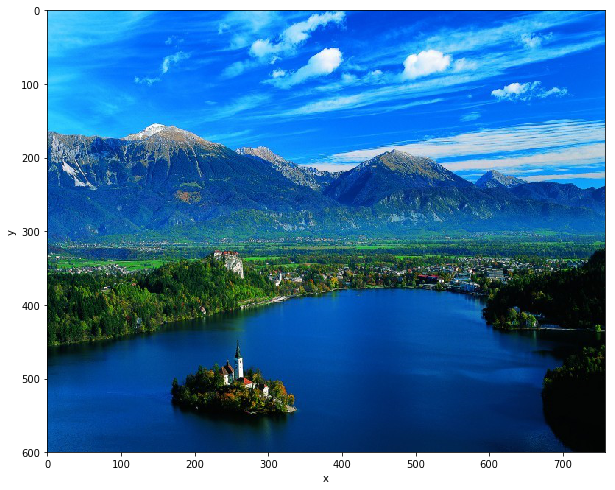

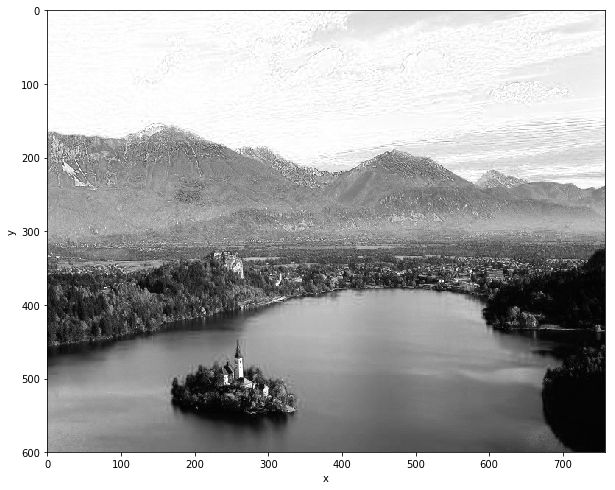

In [15]:
# Pretvorite sliko ("./data/slika.jpg") v sivinsko sliko ter jo prikažite.

plt.figure(figsize= (10, 10))
rvlib.showImage(slika)
plt.figure(figsize= (10, 10))
hsv_siva = convert_to_gray_hsv(slika)
rvlib.showImage(hsv_siva)
# plt.figure(figsize= (10, 10))
# rvlib.showImage(siva)

6. Potrdite, da v barvni sliki "./data/slika.jpg" prevladuje modra barva tako, da izračunate in izpišete razmerje med številom pikslov, ki predstavljajo modre odtenke, in številom vseh pikslov na sliki. Za modre odtenke vzemite piksle katerih vrednost H komponente je na območju $240 \pm 30$ stopinj.

In [16]:
# plt.figure(figsize= (10, 10))
# rvlib.showImage(slika)

#pretvorba v hsv
def bluePercentage(iImage, lower_limit, upper_limit):
    iImage = iImage.astype('float')
    
    iImage = iImage / 255.0
    r,g,b = iImage[:,:,0], iImage[:,:,1], iImage[:,:,2]
    
    h = np.zeros_like(r)
    s = np.zeros_like(r)
    v = np.zeros_like(r)
    
    Cmax = np.maximum(r, np.maximum(g, b))
    Cmin = np.minimum(r, np.minimum(g, b))
    delta = Cmax - Cmin + 1e-7
    
    h[Cmax == r] = 60.0 * ((g[Cmax == r] - b[Cmax == r])/(delta[Cmax == r]) % 6.0)
    h[Cmax == g] = 60.0 * ((b[Cmax == g] - r[Cmax == g])/(delta[Cmax == g]) + 2.0)
    h[Cmax == b] = 60.0 * ((r[Cmax == b] - g[Cmax == b])/(delta[Cmax == b]) + 4.0)
    
    s[delta!=0.0] = delta[delta!=0.0] / (Cmax[delta!=0.0]+1e-7)
    
    v = Cmax
    
    #stevilo modrih pikslov v intervalu lower_limit do upper_limit
    b_interval = np.logical_and((h >=lower_limit), (h <= upper_limit))
    b_in = np.where(b_interval)
    num_of_blue = np.count_nonzero(b_in)
    
    #stevilo vseh
    all_interval = np.logical_and((h >=0), (h <= 360))
    all_in = np.where(all_interval)
    num_of_all = np.count_nonzero(all_in)
    
    b_ratio = (num_of_blue/num_of_all)*100
    print(b_ratio)

In [17]:
bluePercentage(slika, 210, 270)

47.356101127232606
